In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, r2_score, accuracy_score, mean_absolute_error, mean_squared_error, roc_curve, auc, confusion_matrix, classification_report

data=pd.read_excel(r"/Users/mehmetkorkmaz/Applications/venv/Mushroom-Classification.xlsx")

In [2]:
results = pd.DataFrame()
Name = []
Accuracy = []

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
data.head()
#
#Attribute Information: (classes: edible=e, poisonous=p)
#     1. cap-shape:                bell=b,conical=c,convex=x,flat=f,
#                                  knobbed=k,sunken=s
#     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
#     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
#                                  pink=p,purple=u,red=e,white=w,yellow=y
#     4. bruises:                  bruises=t,no=f
#     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
#                                  musty=m,none=n,pungent=p,spicy=s
#     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
#     7. gill-spacing:             close=c,crowded=w,distant=d
#     8. gill-size:                broad=b,narrow=n
#     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,
#                                  green=r,orange=o,pink=p,purple=u,red=e,
#                                  white=w,yellow=y
#    10. stalk-shape:              enlarging=e,tapering=t
#    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,
#                                  rhizomorphs=z,rooted=r,missing=?
#    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
#    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
#    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
#                                  pink=p,red=e,white=w,yellow=y
#    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
#                                  pink=p,red=e,white=w,yellow=y
#    16. veil-type:                partial=p,universal=u
#    17. veil-color:               brown=n,orange=o,white=w,yellow=y
#    18. ring-number:              none=n,one=o,two=t
#    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,
#                                  none=n,pendant=p,sheathing=s,zone=z
#    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,
#                                  orange=o,purple=u,white=w,yellow=y
#    21. population:               abundant=a,clustered=c,numerous=n,
#                                  scattered=s,several=v,solitary=y
#    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,
#                                  urban=u,waste=w,woods=d
#

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
la = LabelEncoder()
for i in data.columns:
    data[i] = la.fit_transform(data[i])

In [6]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [7]:
data['class'].value_counts() #our classes are edible=e, poisonous=p 0 for edible, 1 for poisonous

class
0    4208
1    3916
Name: count, dtype: int64

In [8]:
cor = data.corr()
relations = cor['class'].sort_values(ascending = False)
relations

x = []
for i in range(len(relations)):
    if relations[i]>0:
        x.append(relations.index[i])

In [9]:
data['veil-type']
data['veil-type'].value_counts() #veil type has only 'partial' as its input and there is no 'universal' veil type

veil-type
0    8124
Name: count, dtype: int64

In [10]:
data.drop('veil-type', inplace = True, axis=1) #that is why we do not need it. it has no value to our model
                                               #we drop the veil type column

In [11]:
x = data[x]
x.drop('class', inplace = True, axis = 1) #without 'class' column, x is our input matrix now.
x

# We couldn't find the reason there is a warning, but the code seems to work properly

/var/folders/wp/28y2ysl952qg01qy8dlhmh3c0000gn/T/ipykernel_39585/719595677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop('class', inplace = True, axis = 1) #without 'class' column, x is our input matrix now.


,gill-size,population,habitat,cap-surface,spore-print-color,veil-color,gill-attachment,cap-shape
0,1,3,5,2,2,2,1,5
1,0,2,1,2,3,2,1,5
2,0,2,3,2,3,2,1,0
3,1,3,5,3,2,2,1,5
4,0,0,1,2,3,2,1,5
...,...,...,...,...,...,...,...,...
8119,0,1,2,2,0,1,0,3
8120,0,4,2,2,0,0,0,5
8121,0,1,2,2,0,1,0,2
8122,1,4,2,3,7,2,1,3


In [12]:
y = data['class'] #we create a new matrix with only the 'class' column. this is what we try to find
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state=42)

# Random Forest Classifier

In [14]:
cla = RandomForestClassifier(n_estimators = 10, random_state = 42)
cla.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=10, random_state=42)

In [15]:
predicted = cla.predict(xtest)
predicted

array([0, 1, 1, ..., 0, 0, 1])

In [16]:
print("Accuracy score usign Random Forrest is: {}%".format(accuracy_score(ytest, predicted)*100))

Accuracy score usign Random Forrest is: 99.35992122107336%


In [17]:
Name.append('RandomForrest()')
Accuracy.append(accuracy_score(ytest, predicted)*100)

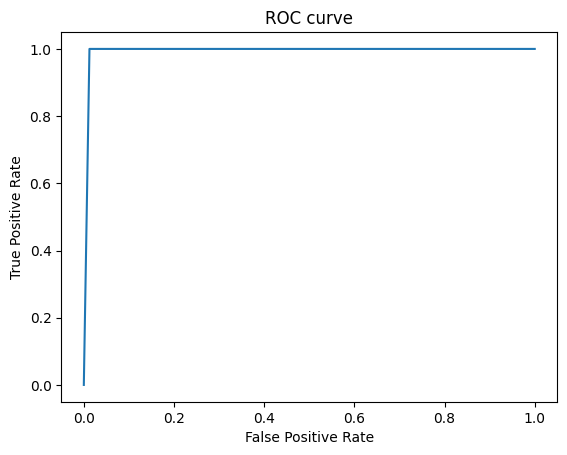

AUC value is 0.99375 


In [18]:
fpr, tpr, threshold= roc_curve(ytest, predicted, pos_label=1)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()
print("AUC value is {} ".format(auc(fpr, tpr)))

<Axes: >

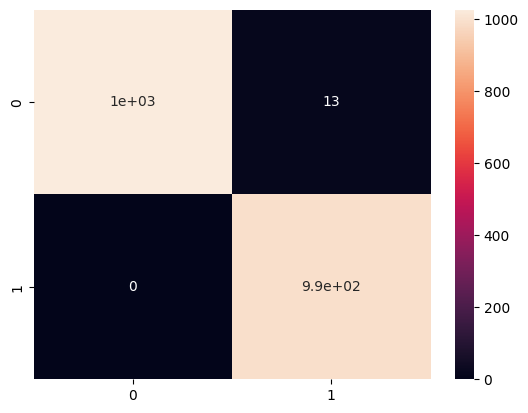

In [19]:
confu = confusion_matrix(ytest, predicted, labels = [0,1])
sns.heatmap(confu, annot=True)

In [ ]:
#only 13  mushrooms falsely classified as poisonous

In [20]:
print("Classification Report for our model is ")
print(classification_report(ytest, predicted))

Classification Report for our model is 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1040
           1       0.99      1.00      0.99       991

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031



# k-NN Classifier

In [22]:
from sklearn.preprocessing import StandardScaler

y = data['class']
x = data.drop('class',axis=1)
scaler = StandardScaler()   #scaled data prevents being underfitted
scaler.fit_transform(x)
x = pd.DataFrame(x)

In [23]:
from sklearn.feature_selection import SelectPercentile ,chi2

Transformer = SelectPercentile(score_func = chi2, percentile = 40)
df_new = Transformer.fit_transform(x,y)

cols_idxs = Transformer.get_support(indices=True)
features_df_new = data.iloc[:,cols_idxs]
features_df_new

,cap-color,gill-attachment,gill-spacing,gill-size,stalk-shape,ring-number,ring-type,population
0,4,1,0,1,0,1,4,3
1,9,1,0,0,0,1,4,2
2,8,1,0,0,0,1,4,2
3,8,1,0,1,0,1,4,3
4,3,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...
8119,4,0,0,0,0,1,4,1
8120,4,0,0,0,0,1,4,4
8121,4,0,0,0,0,1,4,1
8122,4,1,0,1,1,1,0,4


In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state=42)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 91,p = 2,metric='euclidean')


#train model with the training set and training vector
knn.fit(xtrain,ytrain)

#test model with the testing set
predicted= knn.predict(xtest)

KNN_AccScore_percent = accuracy_score(ytest,predicted)*100
KNN_fscore_percent = f1_score(ytest,predicted)*100

KNN_Report_percent = classification_report(ytest,predicted)
print(KNN_Report_percent)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1040
           1       0.99      0.91      0.95       991

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031



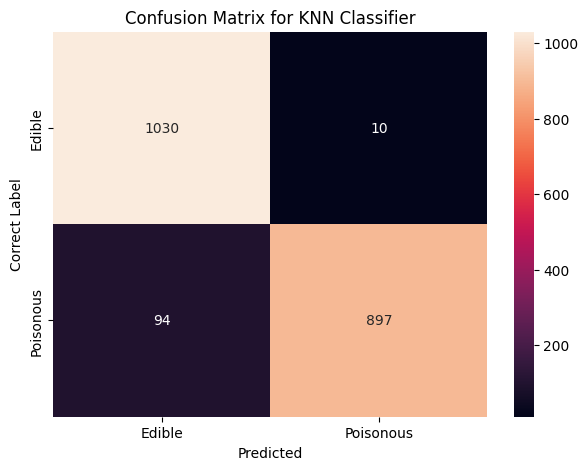

In [26]:
KNN_confusionmatrix = confusion_matrix(ytest,predicted)
plt.figure(figsize=(7,5))
plt.title('Confusion Matrix for KNN Classifier')
sns.heatmap(KNN_confusionmatrix , annot=True,xticklabels=["Edible", "Poisonous"],
           yticklabels=["Edible", "Poisonous"],fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Correct Label')

plt.show()

In [ ]:
# 10 of the edible mushrooms were labeled incorrect, and 94 of the poisonous mushrooms were labeled edible

In [27]:
print("Classification Report for our model is ")
print(classification_report(ytest,predicted))
Name.append('k-NN Classifier()')
Accuracy.append(accuracy_score(ytest, predicted)*100)

Classification Report for our model is 
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1040
           1       0.99      0.91      0.95       991

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031



# Decision Tree Classifier

In [28]:
dst = DecisionTreeClassifier()
dst.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [29]:
predicted = dst.predict(xtest)
predicted

array([0, 1, 1, ..., 0, 0, 1])

In [30]:
print("Accuracy score using Decision Tree is: {}%".format(accuracy_score(ytest, predicted)))

Accuracy score using Decision Tree is: 1.0%


In [31]:
Name.append(dst)
Accuracy.append(accuracy_score(ytest, predicted)*100)

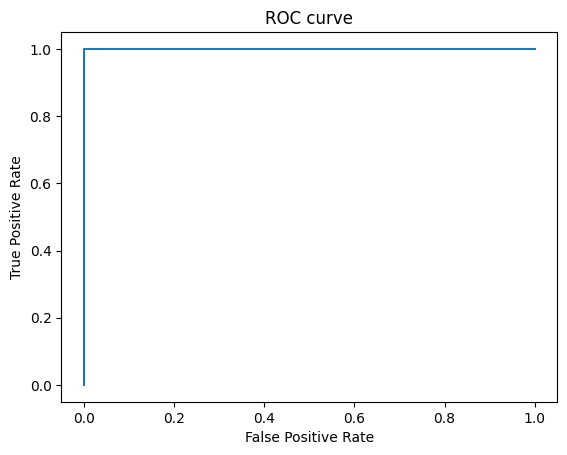

AUC value is 1.0 


In [32]:
fpr, tpr, threshold= roc_curve(ytest, predicted, pos_label=1)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()
print("AUC value is {} ".format(auc(fpr, tpr)))

<Axes: >

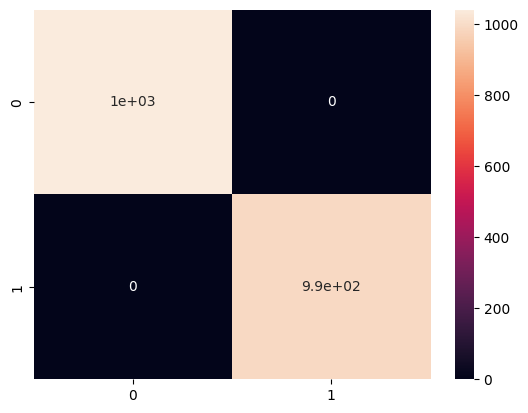

In [33]:
confu = confusion_matrix(ytest, predicted, labels = [0,1])
sns.heatmap(confu, annot=True)

In [34]:
print("Classification Report for our model is ")
print(classification_report(ytest,predicted))

Classification Report for our model is 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



# Logistic Regression 

In [35]:
lr = LogisticRegression()
lr.fit(xtrain, ytrain)

# again, have little idea about this warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
predicted = lr.predict(xtest)
predicted

array([0, 1, 1, ..., 0, 0, 1])

In [37]:
print("Accuracy score using Logistic Regression is: {}%".format(accuracy_score(ytest, predicted)*100))

Accuracy score using Logistic Regression is: 94.97784342688331%


In [38]:
Name.append(lr)
Accuracy.append(accuracy_score(ytest, predicted)*100)

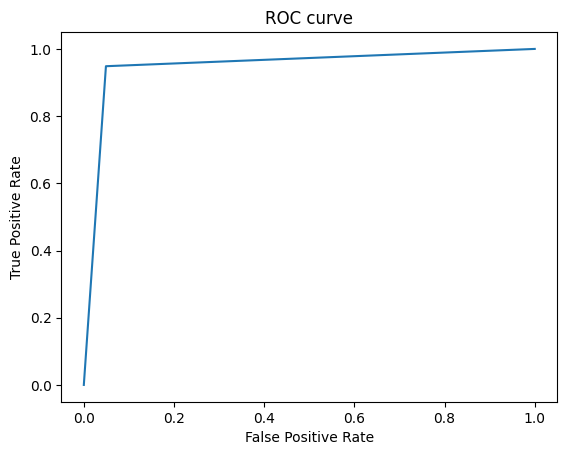

AUC value is 0.9497491849724442 


In [39]:
fpr, tpr, threshold= roc_curve(ytest, predicted, pos_label=1)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()
print("AUC value is {} ".format(auc(fpr, tpr)))

<Axes: >

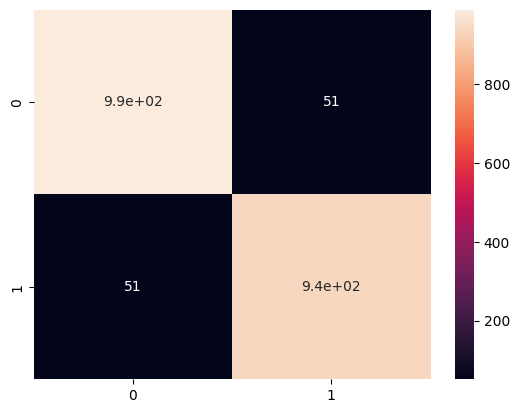

In [40]:
confu = confusion_matrix(ytest, predicted, labels = [0,1])
sns.heatmap(confu, annot=True)

In [41]:
print("Classification Report for our model is ")
print(classification_report(ytest, predicted))

Classification Report for our model is 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1040
           1       0.95      0.95      0.95       991

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031



# Final Results and Comparison

In [42]:
results['Name'] = Name
results['Accuracy'] = Accuracy
results

,Name,Accuracy
0,RandomForrest(),99.359921
1,k-NN Classifier(),94.879370
2,DecisionTreeClassifier(),100.000000
3,LogisticRegression(),94.977843
